### Student Name: Andrew Kim

In [3]:
#TODO: import the modules
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV

### Step 1 – Explain any overfitting or underfitting in the previous model

In [7]:
# It seems likely that the model was comitting to overfitting given that nothing prevented the model from overfitting other than
# making sure to set max_depth to a certain level. I had only set the max_depth to 10, but if I had let the max_depth proceed
# as the model defaulted to (as many as needed to get a perfect result), the model would have kept making branches until all 
# branches at the end were only full of 'pure' leaves. This model may have been underfitted to a degree though, as it still barely
# broke an 80% degree of accuracy.

# Given another validation set though, with a high enough max_depth, the model would not have generalized well and would have 
# produced a low test accuracy.

### Step 2 – Load the data and extract the features

In [10]:
#TODO: load the data and extract the features: 'VendorID', RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip'
features = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 
            'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 
            'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip']

file_path = r'C:\Users\andre\Documents\module05-decision-trees-part-2-andrewks95-main\trip_data.csv'
df = pd.read_csv(file_path, usecols=features)
X = df.iloc[:,0:14].to_numpy()
y = df.iloc[:,14].tolist()

### Step 3 – Split the data
The test set should comprise 30% of the dataset. Ensure the data is randomized and that stratified samples are obtained.

In [11]:
#TODO: Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    stratify = y)
#TODO: fill in the required options

### Step 4 – Instantiate the Decision Tree Classifer

In [12]:
dt_estimator = DecisionTreeClassifier()

### Step 5 – Create a dictionary that contains the decision tree parameters

In [26]:
params = {
    'criterion': ['gini', 'entropy'], #a list of options for criterion.
    'max_depth': [5,10,15],
    'min_samples_split': [120, 170, 230, 270, 290, 310, 330, 350, 390, 480]
}

### Step 6 – Perform the Random search
Provide the dictionary from step 5 above and use the decison tree from step 4 as the estimator.

In [27]:
rand_search = RandomizedSearchCV(estimator=dt_estimator, 
                                 param_distributions=params, 
                                 random_state=7, 
                                 scoring='accuracy', 
                                 verbose=3, #display messages while training
                                 n_iter= 100,#TODO: set n_iter to a value between 50 and 100
                                 cv=10) #TODO: set the number of folds to 10 for the cross validation


estimator = rand_search.fit(X_train, y_train)


print('Best parameters:', estimator.best_params_)
print('Best score:', estimator.best_score_) #note: if the score is low, increase n_iter or adjust the values in step 5.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] min_samples_split=120, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=120, max_depth=5, criterion=gini, score=0.666, total=   0.3s
[CV] min_samples_split=120, max_depth=5, criterion=gini ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  min_samples_split=120, max_depth=5, criterion=gini, score=0.662, total=   0.3s
[CV] min_samples_split=120, max_depth=5, criterion=gini ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  min_samples_split=120, max_depth=5, criterion=gini, score=0.664, total=   0.3s
[CV] min_samples_split=120, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=120, max_depth=5, criterion=gini, score=0.665, total=   0.3s
[CV] min_samples_split=120, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=120, max_depth=5, criterion=gini, score=0.668, total=   0.3s
[CV] min_samples_split=120, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=120, max_depth=5, criterion=gini, score=0.665, total=   0.3s
[CV] min_samples_split=120, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=120, max_depth=5, criterion=gini, score=0.667, total=   0.3s
[CV] min_samples_split=120, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=120, max_depth=5, criterion=gini, score=0.665, total=   0.3s
[CV] min_samples_split=120, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=120, max_depth=5, criterion=gini, score=

[CV]  min_samples_split=310, max_depth=5, criterion=gini, score=0.665, total=   0.3s
[CV] min_samples_split=310, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=310, max_depth=5, criterion=gini, score=0.667, total=   0.3s
[CV] min_samples_split=310, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=310, max_depth=5, criterion=gini, score=0.664, total=   0.3s
[CV] min_samples_split=310, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=310, max_depth=5, criterion=gini, score=0.669, total=   0.3s
[CV] min_samples_split=310, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=310, max_depth=5, criterion=gini, score=0.666, total=   0.3s
[CV] min_samples_split=330, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=330, max_depth=5, criterion=gini, score=0.665, total=   0.3s
[CV] min_samples_split=330, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=330, max_depth=5, criterion=gini, score=

[CV]  min_samples_split=120, max_depth=10, criterion=gini, score=0.821, total=   0.5s
[CV] min_samples_split=120, max_depth=10, criterion=gini .............
[CV]  min_samples_split=120, max_depth=10, criterion=gini, score=0.820, total=   0.5s
[CV] min_samples_split=170, max_depth=10, criterion=gini .............
[CV]  min_samples_split=170, max_depth=10, criterion=gini, score=0.820, total=   0.5s
[CV] min_samples_split=170, max_depth=10, criterion=gini .............
[CV]  min_samples_split=170, max_depth=10, criterion=gini, score=0.817, total=   0.5s
[CV] min_samples_split=170, max_depth=10, criterion=gini .............
[CV]  min_samples_split=170, max_depth=10, criterion=gini, score=0.816, total=   0.5s
[CV] min_samples_split=170, max_depth=10, criterion=gini .............
[CV]  min_samples_split=170, max_depth=10, criterion=gini, score=0.818, total=   0.5s
[CV] min_samples_split=170, max_depth=10, criterion=gini .............
[CV]  min_samples_split=170, max_depth=10, criterion=gini,

[CV]  min_samples_split=330, max_depth=10, criterion=gini, score=0.807, total=   0.5s
[CV] min_samples_split=330, max_depth=10, criterion=gini .............
[CV]  min_samples_split=330, max_depth=10, criterion=gini, score=0.805, total=   0.5s
[CV] min_samples_split=330, max_depth=10, criterion=gini .............
[CV]  min_samples_split=330, max_depth=10, criterion=gini, score=0.806, total=   0.5s
[CV] min_samples_split=330, max_depth=10, criterion=gini .............
[CV]  min_samples_split=330, max_depth=10, criterion=gini, score=0.804, total=   0.5s
[CV] min_samples_split=330, max_depth=10, criterion=gini .............
[CV]  min_samples_split=330, max_depth=10, criterion=gini, score=0.806, total=   0.5s
[CV] min_samples_split=330, max_depth=10, criterion=gini .............
[CV]  min_samples_split=330, max_depth=10, criterion=gini, score=0.802, total=   0.5s
[CV] min_samples_split=330, max_depth=10, criterion=gini .............
[CV]  min_samples_split=330, max_depth=10, criterion=gini,

[CV]  min_samples_split=170, max_depth=15, criterion=gini, score=0.897, total=   0.6s
[CV] min_samples_split=170, max_depth=15, criterion=gini .............
[CV]  min_samples_split=170, max_depth=15, criterion=gini, score=0.900, total=   0.6s
[CV] min_samples_split=170, max_depth=15, criterion=gini .............
[CV]  min_samples_split=170, max_depth=15, criterion=gini, score=0.901, total=   0.6s
[CV] min_samples_split=170, max_depth=15, criterion=gini .............
[CV]  min_samples_split=170, max_depth=15, criterion=gini, score=0.898, total=   0.6s
[CV] min_samples_split=170, max_depth=15, criterion=gini .............
[CV]  min_samples_split=170, max_depth=15, criterion=gini, score=0.904, total=   0.6s
[CV] min_samples_split=170, max_depth=15, criterion=gini .............
[CV]  min_samples_split=170, max_depth=15, criterion=gini, score=0.900, total=   0.6s
[CV] min_samples_split=230, max_depth=15, criterion=gini .............
[CV]  min_samples_split=230, max_depth=15, criterion=gini,

[CV]  min_samples_split=330, max_depth=15, criterion=gini, score=0.873, total=   0.6s
[CV] min_samples_split=330, max_depth=15, criterion=gini .............
[CV]  min_samples_split=330, max_depth=15, criterion=gini, score=0.876, total=   0.6s
[CV] min_samples_split=330, max_depth=15, criterion=gini .............
[CV]  min_samples_split=330, max_depth=15, criterion=gini, score=0.869, total=   0.6s
[CV] min_samples_split=350, max_depth=15, criterion=gini .............
[CV]  min_samples_split=350, max_depth=15, criterion=gini, score=0.873, total=   0.5s
[CV] min_samples_split=350, max_depth=15, criterion=gini .............
[CV]  min_samples_split=350, max_depth=15, criterion=gini, score=0.872, total=   0.5s
[CV] min_samples_split=350, max_depth=15, criterion=gini .............
[CV]  min_samples_split=350, max_depth=15, criterion=gini, score=0.866, total=   0.6s
[CV] min_samples_split=350, max_depth=15, criterion=gini .............
[CV]  min_samples_split=350, max_depth=15, criterion=gini,

[CV]  min_samples_split=170, max_depth=5, criterion=entropy, score=0.660, total=   0.4s
[CV] min_samples_split=230, max_depth=5, criterion=entropy ...........
[CV]  min_samples_split=230, max_depth=5, criterion=entropy, score=0.663, total=   0.3s
[CV] min_samples_split=230, max_depth=5, criterion=entropy ...........
[CV]  min_samples_split=230, max_depth=5, criterion=entropy, score=0.661, total=   0.4s
[CV] min_samples_split=230, max_depth=5, criterion=entropy ...........
[CV]  min_samples_split=230, max_depth=5, criterion=entropy, score=0.662, total=   0.3s
[CV] min_samples_split=230, max_depth=5, criterion=entropy ...........
[CV]  min_samples_split=230, max_depth=5, criterion=entropy, score=0.663, total=   0.3s
[CV] min_samples_split=230, max_depth=5, criterion=entropy ...........
[CV]  min_samples_split=230, max_depth=5, criterion=entropy, score=0.664, total=   0.4s
[CV] min_samples_split=230, max_depth=5, criterion=entropy ...........
[CV]  min_samples_split=230, max_depth=5, crit

[CV]  min_samples_split=350, max_depth=5, criterion=entropy, score=0.661, total=   0.3s
[CV] min_samples_split=350, max_depth=5, criterion=entropy ...........
[CV]  min_samples_split=350, max_depth=5, criterion=entropy, score=0.662, total=   0.3s
[CV] min_samples_split=350, max_depth=5, criterion=entropy ...........
[CV]  min_samples_split=350, max_depth=5, criterion=entropy, score=0.663, total=   0.3s
[CV] min_samples_split=350, max_depth=5, criterion=entropy ...........
[CV]  min_samples_split=350, max_depth=5, criterion=entropy, score=0.664, total=   0.3s
[CV] min_samples_split=350, max_depth=5, criterion=entropy ...........
[CV]  min_samples_split=350, max_depth=5, criterion=entropy, score=0.661, total=   0.3s
[CV] min_samples_split=350, max_depth=5, criterion=entropy ...........
[CV]  min_samples_split=350, max_depth=5, criterion=entropy, score=0.665, total=   0.3s
[CV] min_samples_split=350, max_depth=5, criterion=entropy ...........
[CV]  min_samples_split=350, max_depth=5, crit

[CV]  min_samples_split=230, max_depth=10, criterion=entropy, score=0.825, total=   0.5s
[CV] min_samples_split=230, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=230, max_depth=10, criterion=entropy, score=0.824, total=   0.5s
[CV] min_samples_split=230, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=230, max_depth=10, criterion=entropy, score=0.828, total=   0.5s
[CV] min_samples_split=230, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=230, max_depth=10, criterion=entropy, score=0.827, total=   0.5s
[CV] min_samples_split=230, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=230, max_depth=10, criterion=entropy, score=0.826, total=   0.5s
[CV] min_samples_split=230, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=230, max_depth=10, criterion=entropy, score=0.824, total=   0.5s
[CV] min_samples_split=230, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=230, max_depth=1

[CV]  min_samples_split=350, max_depth=10, criterion=entropy, score=0.815, total=   0.5s
[CV] min_samples_split=350, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=350, max_depth=10, criterion=entropy, score=0.814, total=   0.5s
[CV] min_samples_split=350, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=350, max_depth=10, criterion=entropy, score=0.811, total=   0.5s
[CV] min_samples_split=350, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=350, max_depth=10, criterion=entropy, score=0.810, total=   0.5s
[CV] min_samples_split=350, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=350, max_depth=10, criterion=entropy, score=0.815, total=   0.5s
[CV] min_samples_split=390, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=390, max_depth=10, criterion=entropy, score=0.813, total=   0.5s
[CV] min_samples_split=390, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=390, max_depth=1

[CV]  min_samples_split=230, max_depth=15, criterion=entropy, score=0.893, total=   0.6s
[CV] min_samples_split=230, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=230, max_depth=15, criterion=entropy, score=0.898, total=   0.6s
[CV] min_samples_split=230, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=230, max_depth=15, criterion=entropy, score=0.894, total=   0.6s
[CV] min_samples_split=270, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=270, max_depth=15, criterion=entropy, score=0.885, total=   0.6s
[CV] min_samples_split=270, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=270, max_depth=15, criterion=entropy, score=0.883, total=   0.6s
[CV] min_samples_split=270, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=270, max_depth=15, criterion=entropy, score=0.887, total=   0.6s
[CV] min_samples_split=270, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=270, max_depth=1

[CV]  min_samples_split=350, max_depth=15, criterion=entropy, score=0.874, total=   0.6s
[CV] min_samples_split=390, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=390, max_depth=15, criterion=entropy, score=0.866, total=   0.6s
[CV] min_samples_split=390, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=390, max_depth=15, criterion=entropy, score=0.859, total=   0.6s
[CV] min_samples_split=390, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=390, max_depth=15, criterion=entropy, score=0.868, total=   0.6s
[CV] min_samples_split=390, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=390, max_depth=15, criterion=entropy, score=0.863, total=   0.6s
[CV] min_samples_split=390, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=390, max_depth=15, criterion=entropy, score=0.865, total=   0.6s
[CV] min_samples_split=390, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=390, max_depth=1

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  4.7min finished


Best parameters: {'min_samples_split': 120, 'max_depth': 15, 'criterion': 'entropy'}
Best score: 0.9174380093344119


### Step 7 – Train the decision tree

In [28]:
#Instantiate the Decision Tree Classifer object 
dt_classifier = DecisionTreeClassifier(criterion= 'entropy', #TODO: use the value from the random search results.
                                       max_depth= 15,#TODO: use the value from the random search results.
                                       min_samples_split= 120 #TODO: use the value from the random search results.
                                      )

#Train Decision Tree Classifer using the `fit` method
dt_classifier.fit(X_train, y_train)

#Make predictions with `X_test` and store the result in a variable called `y_pred
y_pred = dt_classifier.predict(X_test)

### Step 8 – Evaluate the accuracy

In [30]:
#TODO: calculate and display the accuracy score using `y_test` and `y_pred`
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test, y_pred),3) * 100)

92.10000000000001


### Step 9 – Visualize the decision tree

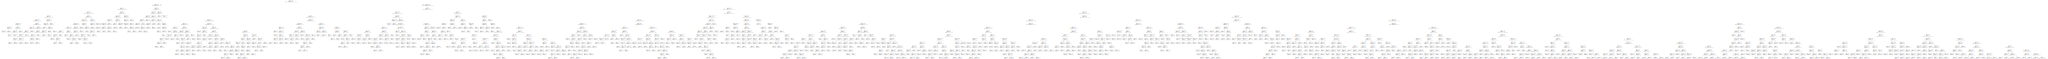

In [31]:
#TODO: Display the decision tree
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt_classifier)
graph = graphviz.Source(dot_data)
graph

### Step 10 – Summarize the results using one paragraph (2-5 sentences)

In [ ]:
# Here we have a decision tree that maintains relatively loww bias and low variance. By adjusting our hyperparameter values,
# we have adjusted the values so that the tree is not excessively splitting and leaving too few samples (too few leaves) at the
# end of each branch. We optimized our parameters through random search hyperparameter optimization. We obtained an initial 
# accuracy of 91.7% on the testing data, and an accuracy of 92.1% on the validation data, showing that our model is robust
# and able to generalize to unseen data with strong results.